# Palmer Penguins

This notebook contains my analysis of the famous Palmer Penguins dataset. This dataset contains measurements for three species of penguin (Adélie, Chinstrap, and Gentoo), which were observed on three islands (Biscoe, Dream, and Torgersen) in Antarctica's Palmer Archipelago.

The dataset was collected and compiled by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. Allison Horst [shared and maintains the dataset](https://allisonhorst.github.io/palmerpenguins/), with the aim of providing a great dataset for data exploration & visualisation, as an alternative to [the Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). The dataset has been made available under a [CC-0 license](https://creativecommons.org/public-domain/cc0/) meaning it can freely be worked upon in the public domain.

## Reviewing the Dataset
I will begin by importing [pandas](https://pandas.pydata.org/) as a useful tool for data analysis and manipulation. I will then use pandas to read in the dataset and take a preliminary look. As I have not worked with this dataset before, I will take some time to familiarise myself with it before proceeding to any analysis. Since I will create plots later in my analysis, I'll also take the opportunity to import [pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) and [seaborn](https://seaborn.pydata.org/tutorial/introduction.html) at the start too. I will also set the [default visual Seaborn theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme) for the plots.

In [30]:
# Import packages for use in my analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn visual theme for plots
sns.set()

# Load the Penguins dataset and take a look
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


The dataset contains 344 rows, with each row corresponding to a unique penguin. I can see that for each penguin, the researchers captured seven variables:
- **species:** which of the three species (Adélie, Chinstrap, or Gentoo) the penguin belongs to
- **island:** which of the three islands (Biscoe, Dream, or Torgersen) the penguin was found on
- **bill_length_mm:** length (in mm) of the penguin's culmen (upper ridge of the penguin's bill)
- **bill_depth_mm:** depth (in mm) of the penguin's culmen
- **flipper_length_mm:** length (in mm) of the penguin's flipper
- **body_mass_g:** body mass (in g) of the penguin
- **sex:** whether the penguin was Female or Male

I will now use the [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function to get a quick overview of some key data points for the numeric variables:

In [31]:
sns.set()

In [32]:
# Describe the dataset
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Looking at the **count** figures here, I can see that this data only corresponds to 342 of the penguins. Since there were 344 penguins initially, they must have been unable to get measurements for two of the penguins. I could have searched for these entries in the dataset, but fortunately they appeared in my initial look at the dataset, where the NaN ([not a number](https://www.turing.com/kb/nan-values-in-python)) values appear for rows **3** and **339**. I can see that qualitative data (species and island) was still captured for these penguins, so I should keep in mind later in my analysis that any quantitative and qualitative counts may misalign by up to 2.

The table description above provided an overview of the four numeric variables. For the three remaining non-numeric variables, I will now get an idea of the proportional split among them by using the [value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) function to look at unique counts:

In [33]:
# Count the number of penguins of each species
df["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [34]:
# Count the number of penguins on each island
df["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [35]:
# Count the number of penguins of each sex
df["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

Looking at these, I can see the penguins in the dataset are split roughly 45/35/20 by species, roughly 50/35/15 by island, and roughly 50/50 by sex.

## Distribution of Features
Now I'm going to take a look at how the distribution of each quantitative variable looks.

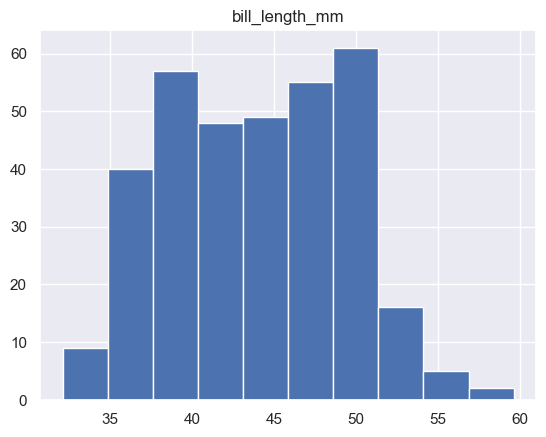

In [51]:
col = "bill_length_mm"
df[col].hist()
plt.title(col)
plt.show()

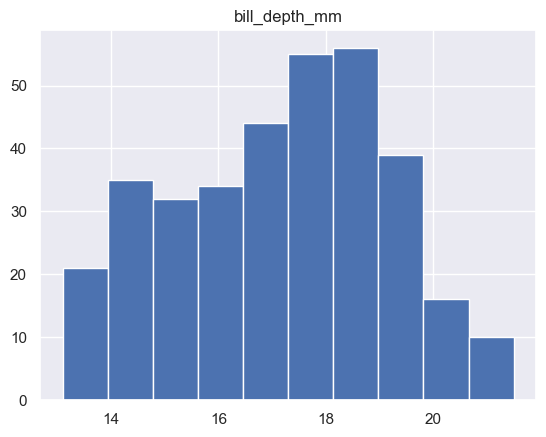

In [50]:
col = "bill_depth_mm"
df[col].hist()
plt.title(col)
plt.show()

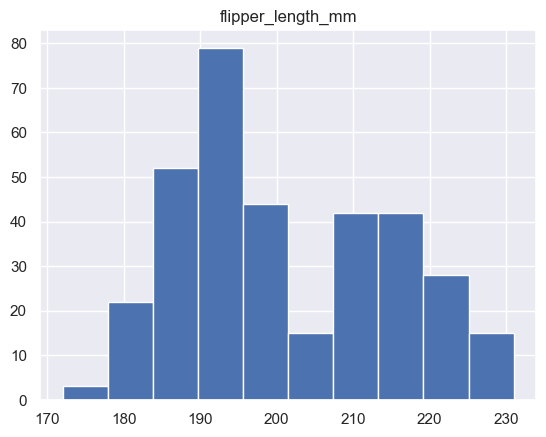

In [52]:
col = "flipper_length_mm"
df[col].hist()
plt.title(col)
plt.show()

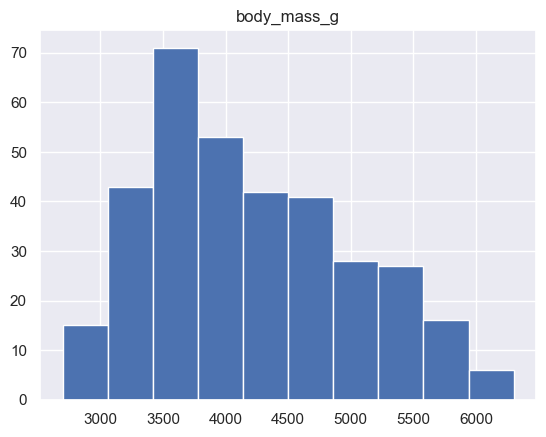

In [53]:
col = "body_mass_g"
df[col].hist()
plt.title(col)
plt.show()

c:\Users\benka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\benka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\benka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\benka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

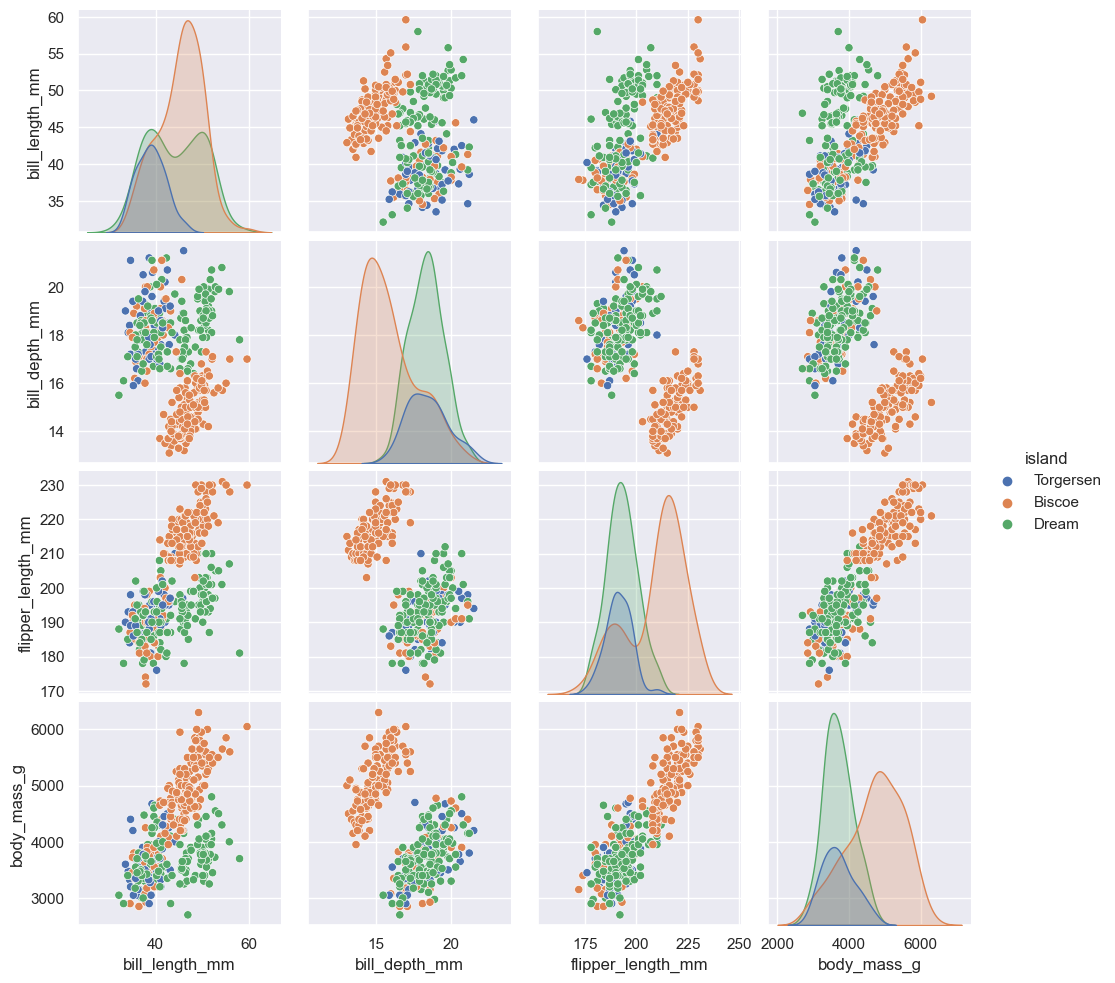

In [66]:
sns.pairplot(df, hue="island")

c:\Users\benka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\benka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\benka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\benka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

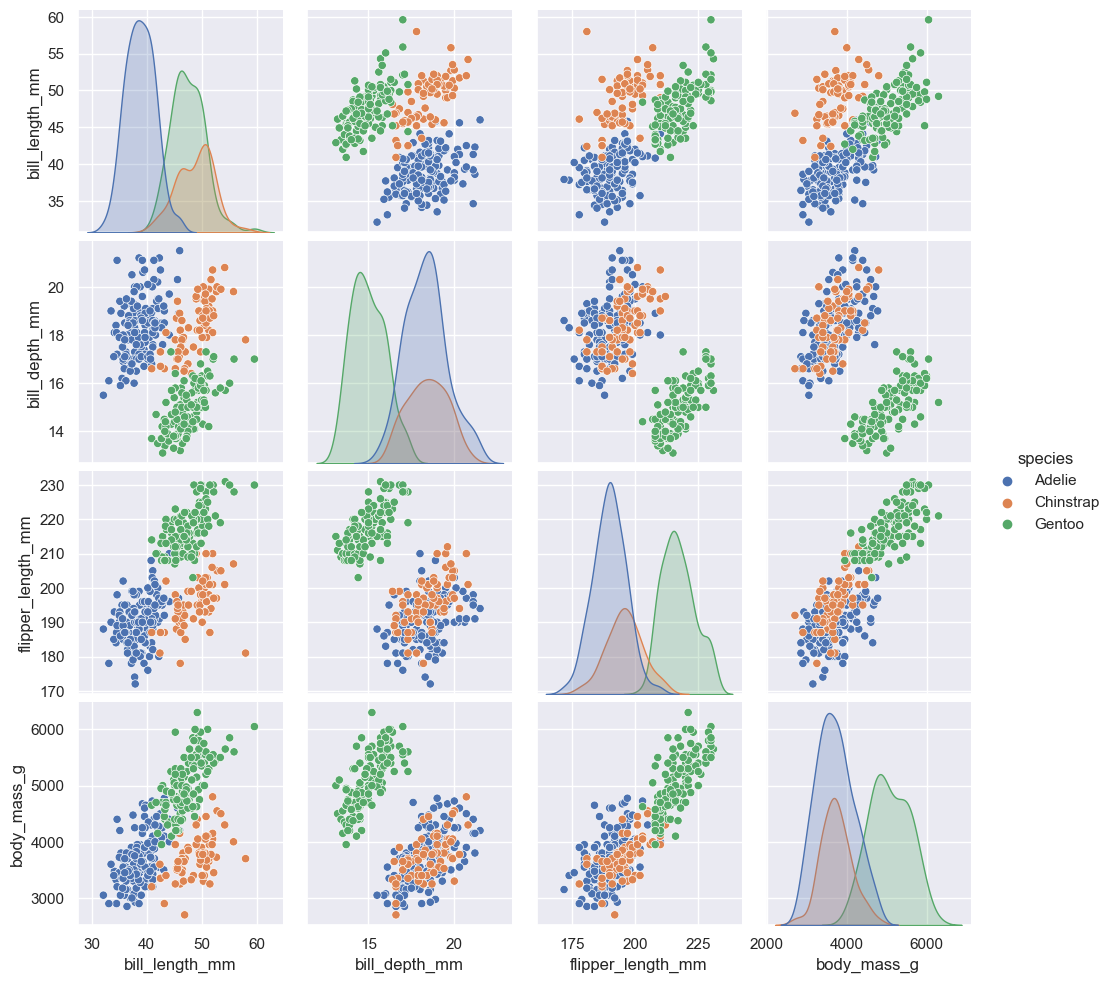

In [61]:
sns.pairplot(df, hue="species")

c:\Users\benka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\benka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\benka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\benka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

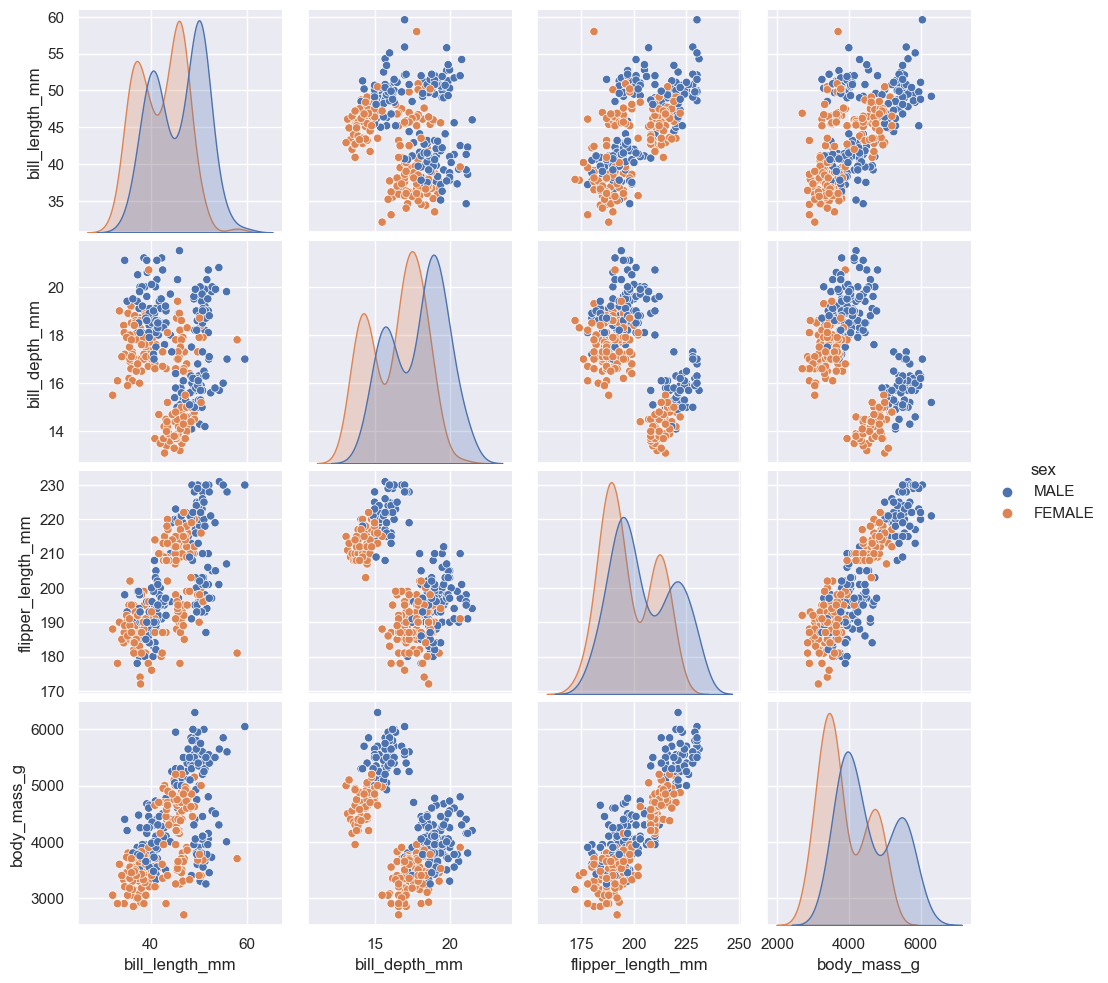

In [62]:
sns.pairplot(df, hue="sex")

## Species-Specific Analysis
Having taken an initial look at the data, it seems to me that it would be useful to break the data down by species and begin looking at the variation both between and within each species grouping. I will begin by creating new dataframes by filtering the initial dataset by species:

In [40]:
# Create dataframes for each species
adelie_df = df.loc[(df['species'] == 'Adelie')]
chinstrap_df = df.loc[(df['species'] == 'Chinstrap')]
gentoo_df = df.loc[(df['species'] == 'Gentoo')]


Now I'll take a quick look at each one using describe() again:

In [41]:
adelie_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,151.000000,151.000000,151.000000,151.000000
mean,38.791391,18.346358,189.953642,3700.662252
std,2.663405,1.216650,6.539457,458.566126
min,32.100000,15.500000,172.000000,2850.000000
25%,36.750000,17.500000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.750000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [42]:
chinstrap_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


In [43]:
gentoo_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


Glancing over these data, it seems clear that Gentoo is, in general, the largest species (by a significant margin). Chinstrap comes next, although it is much closer to Adélie across most metrics. Tables of numbers will only tell us so much, so let's start visualing the data to help to bring it to life.

First I'll look at each species individually to get a feel for their data before stepping back out to take a wider look.

<Axes: >

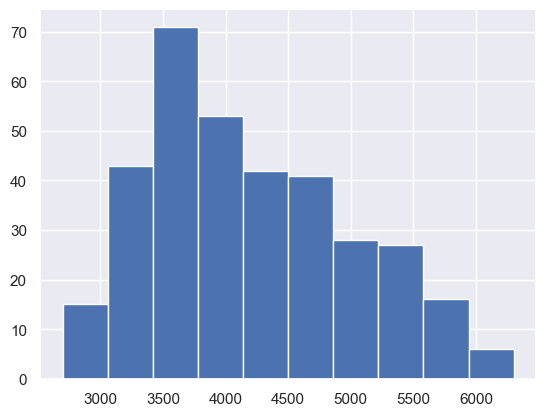

In [44]:
df["body_mass_g"].hist()

### Adélie Species
I am going to use pylot and seaborn to generate a scatterplot which looks at a number of variables: the x and y axes will see how Bill Length and Bill Depth correlate with each other, the colour will show the variation across Sex, while the size of the datapoints will show the Body Mass:

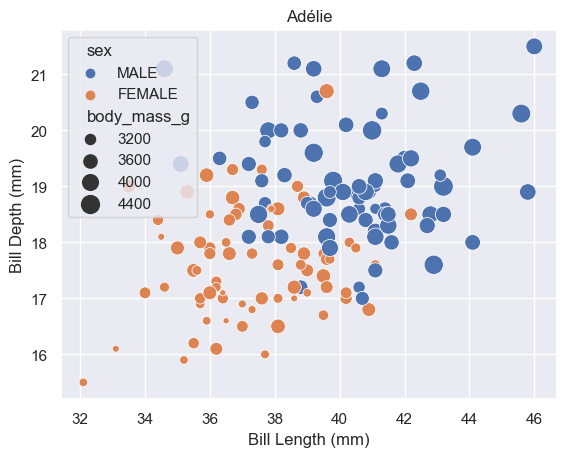

In [45]:
# assigning variables based on the datapoints I want to look at
ad_x = adelie_df['bill_length_mm']
ad_y = adelie_df['bill_depth_mm']
ad_hue = adelie_df['sex']
ad_size = adelie_df['body_mass_g']

# Scatter plot with color based on 'sex' and size based on 'body_mass_g'
sns.scatterplot(x=ad_x, y=ad_y, hue=ad_hue, size=ad_size, sizes=(20, 200), legend="brief")
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Adélie')
plt.show()

Looking at this chart, it is clear to see that Female Adélie penguins tend to be have smaller bills (with the exception of one outlier that has a particularly deep, but not particularly long bill). They also tend to have a lower Body Mass.

***

### End